In [1]:
import os
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import pandas as pd
import numpy as np
from tableone import TableOne
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import missingno as msno
# RF
from sklearn.ensemble import RandomForestClassifier
# LR
from sklearn.linear_model import LogisticRegression
pd.options.display.max_columns = None
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Activation, Dropout
from keras import backend as K
from scipy.stats import zscore
import sklearn.utils as utils
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import pickle
from IPython.display import display, HTML
from tqdm.notebook import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.svm as svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import sklearn.svm as svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import scipy.stats as stats
from scipy.stats import zscore

import seaborn as sns
import imblearn
import polars as pl

sns.set_style(
    {
        "axes.edgecolor": "0",
        "ytick.color": "0",
        "xtick.color": "black",
        "xtick.direction": "in",
        "ytick.direction": "in",
        "text.color": "black",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.facecolor": "white",
        "axes.grid": False,
        "patch.edgecolor": "black",
        'font.family': ['sans-serif']
    }
)
sns.set_palette("tab10")

2023-08-29 16:21:57.303454: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 16:21:57.564419: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-29 16:21:57.619278: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-29 16:21:57.619305: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
datapath= '/home/wlsdud022/data/6d007e8d-0f03-45ed-bd30-f7c6de906ac0/project_data/project_data/EMR/jy/Post-induction/Input_preprocessing/'
df_pih = pd.read_csv(os.path.join(datapath,'PIH_input_new.csv'))

In [3]:
print(df_pih.keys())

Index(['OPID', 'ASA', 'Sex', 'Age', 'HT', 'WT', 'BMI', 'rdw', 'mpv', 'pdw',
       'e_alc', 'e_neutro', 'na', 'alp', 'tc', 'egfr_ce', 'egfr_md',
       'icteric_index', 'wbc', 'rbc', 'mcv', 'mch', 'mchc', 'e_lympho',
       'e_baso', 'ig', 'plt', 'hb', 'hct', 'pt_sec', 'pt_inr', 'aptt', 'k',
       'cl', 'ca', 'glu', 'cr', 'bun', 'ast', 'alt', 'tp', 'ua', 'tco2',
       'bilirubin', 'crp', 'alb', 'mono', 'e_anc', 'OP_CODE', 'EMOP',
       'induc_propofol', 'induc_midazolam', 'induc_pentotal', 'Desflurane',
       'Sevoflurane', 'Propofol', 'WARD_SBP', 'WARD_DBP', 'WARD_MBP',
       'Pre-induction_SBP', 'Pre-induction_DBP', 'Pre-induction_MBP',
       'Hypotension', 'Hypotension_Area', 'PIH_Gr', 'PIH_Gr1', 'PIH_Gr2',
       'PIH_Gr3', 'Hypotension_Time(minute)', 'MBP_Max', 'MBP_Mean', 'MBP_Min',
       'area_time'],
      dtype='object')


In [4]:
columns = ['ASA', 'Sex', 'Age', 'HT', 'WT', 'BMI', 
           'WARD_SBP', 'WARD_DBP', 'WARD_MBP',
           'Pre-induction_SBP', 'Pre-induction_DBP', 'Pre-induction_MBP',
           'MBP_Max', 'MBP_Mean', 'MBP_Min','area_time',
           'Hypotension', 'Hypotension_Area','Hypotension_Time(minute)',
           'rdw', 'mpv', 'pdw', 'e_alc', 'e_neutro', 'na', 'alp', 'tc', 'egfr_ce', 'egfr_md',
       'icteric_index', 'wbc', 'rbc', 'mcv', 'mch', 'mchc', 'e_lympho',
       'e_baso', 'ig', 'plt', 'hb', 'hct', 'pt_sec', 'pt_inr', 'aptt', 'k',
       'cl', 'ca', 'glu', 'cr', 'bun', 'ast', 'alt', 'tp', 'ua', 'tco2',
       'bilirubin', 'crp', 'alb', 'mono', 'e_anc', 'EMOP',
       'induc_propofol', 'induc_midazolam', 'induc_pentotal', 'Desflurane',
       'Sevoflurane', 'Propofol', 'PIH_Gr']
categorical = ['Hypotension', 'PIH_Gr', 'ASA', 'Sex']
groupby = 'PIH_Gr'
# groupby = 'Hypotension'
pd.set_option('display.max_rows', 10000)

TableOne(df_pih, columns, categorical, groupby, pval=True, pval_test_name=True)

/home/wlsdud022/.local/lib/python3.8/site-packages/tableone/tableone.py:241: DeprecationWarning: The pval_test_name argument is deprecated; use htest_name instead.
  warnings.warn("The pval_test_name argument is deprecated; use "
/home/wlsdud022/.local/lib/python3.8/site-packages/tableone/tableone.py:1227: UserWarning: No P-Value was computed for area_time due to the low number of observations.
  warnings.warn(msg)
/home/wlsdud022/.local/lib/python3.8/site-packages/tableone/tableone.py:1227: UserWarning: No P-Value was computed for Hypotension_Area due to the low number of observations.
  warnings.warn(msg)
/home/wlsdud022/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/wlsdud022/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof

Grouped by PIH_Gr                                                                                                                                        
                                                  Missing          Overall                0                1                2                3 P-Value                                       Test
n                                                                    71473            53288             6061             6062             6062                                                   
ASA, n (%)                          1.0                 3       6806 (9.5)      5378 (10.1)        482 (8.0)        463 (7.6)        483 (8.0)  <0.001  Chi-squared (warning: expected count < 5)
                                    2.0                       55578 (77.8)     42455 (79.7)      4633 (76.4)      4483 (74.0)      4007 (66.1)                                                   
                                    3.0                        8420 (11.8)       5096 (9.6)       876 (14.5)      1044 (17.2)      1404 (23.2)                                                   
                                    4.0                          631 (0.9)        339 (0.6)         66 (1.1)         68 (1.1)        158 (2.6)                                                   
                                    5.0                           21 (0.0)          9 (0.0)          1 (0.0)          4 (0.1)          7 (0.1)                                                   
                                    6.0                           14 (0.0)          9 (0.0)          3 (0.0)                           2 (0.0)                                                   
Sex, n (%)                          0                   0     32639 (45.7)     24225 (45.5)      2818 (46.5)      2780 (45.9)      2816 (46.5)   0.242                                Chi-squared
                                    1                         38834 (54.3)     29063 (54.5)      3243 (53.5)      3282 (54.1)      3246 (53.5)                                                   
Age, mean (SD)                                          0      55.6 (15.1)      54.9 (14.6)      57.7 (15.7)      58.0 (15.9)      58.0 (17.3)  <0.001                              One-way ANOVA
HT, mean (SD)                                        2650      162.7 (8.8)      162.9 (8.8)      162.1 (8.8)      161.9 (9.1)      162.1 (9.2)  <0.001                              One-way ANOVA
WT, mean (SD)                                        2424      64.4 (12.5)      64.7 (12.5)      63.2 (12.2)      63.1 (12.2)      63.5 (13.1)  <0.001                              One-way ANOVA
BMI, mean (SD)                                       2656       24.2 (3.8)       24.3 (3.7)       24.0 (3.8)       24.0 (3.9)       24.1 (4.2)  <0.001                              One-way ANOVA
WARD_SBP, mean (SD)                                     0     121.6 (14.2)     122.1 (14.1)     120.3 (13.8)     120.5 (14.2)     120.1 (14.6)  <0.001                              One-way ANOVA
WARD_DBP, mean (SD)                                     0       73.8 (8.0)       74.6 (7.9)       72.2 (7.6)       71.7 (7.6)       70.4 (8.2)  <0.001                              One-way ANOVA
WARD_MBP, mean (SD)                                     0       89.4 (9.3)       90.1 (9.3)       87.9 (8.9)       87.6 (8.9)       86.6 (9.2)  <0.001                              One-way ANOVA
Pre-induction_SBP, mean (SD)                            0     140.1 (26.2)     142.1 (26.2)     134.7 (25.0)     135.0 (25.3)     133.4 (26.2)  <0.001                              One-way ANOVA
Pre-induction_DBP, mean (SD)                            0      78.2 (13.9)      79.4 (13.5)      75.5 (13.6)      75.1 (14.0)      72.6 (15.0)  <0.001                              One-way ANOVA
Pre-induction_MBP, mean (SD)                            0      98.5 (15.8)     100.0 (15.4)      94.9 (15.4)      94.7 (15.8)      92.5 (16.3)  <0.001          

## 저혈압 구간 면적 Histogram
---

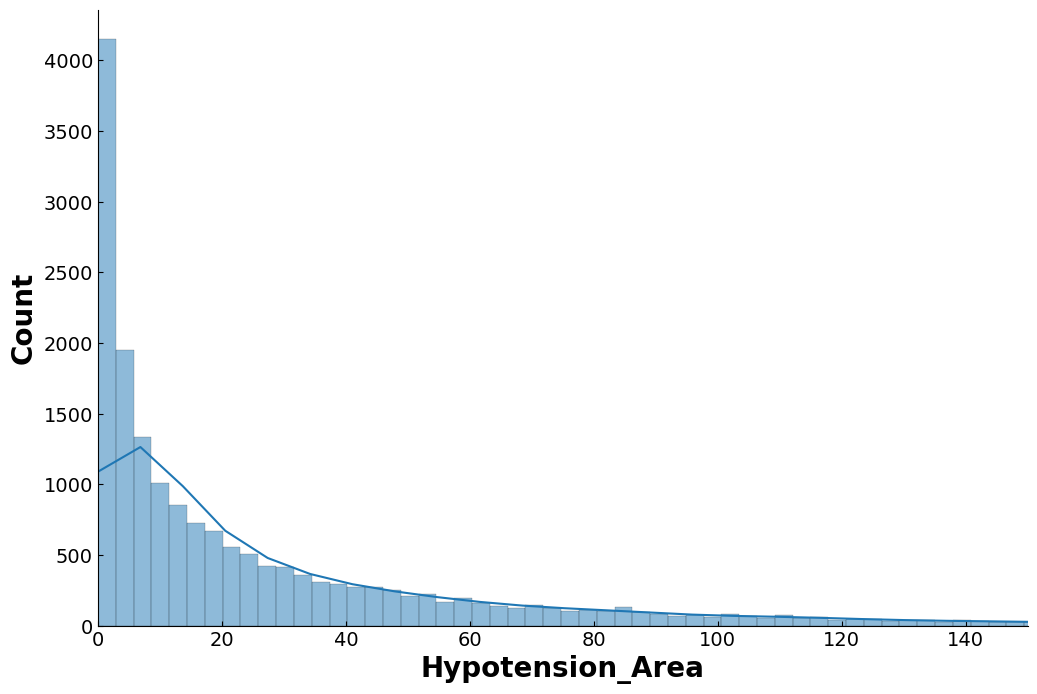

In [5]:
plt.figure(figsize=(12,8))
# ax=sns.histplot(df_pih['Hypotension_Area'][df_pih['Hypotension_Area']>1], kde=True)
ax=sns.histplot(df_pih['Hypotension_Area'], kde=True)
ax.set_xlabel('Hypotension_Area', fontsize=20, weight='bold')
ax.set_ylabel('Count', fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,150)
plt.show()

## 저혈압 지속 시간 Histogram
---

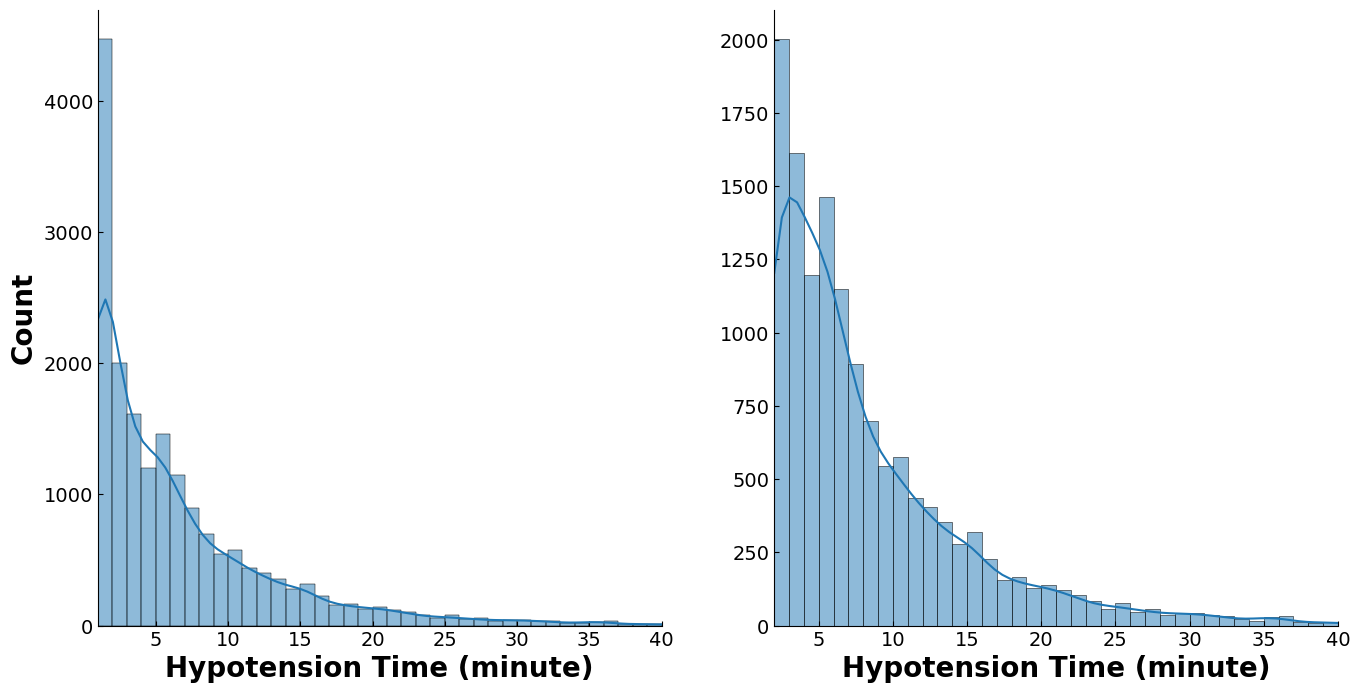

In [6]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
ax=sns.histplot(df_pih['Hypotension_Time(minute)'][df_pih['Hypotension_Time(minute)']!=0], kde=True, binwidth=1)
# ax=sns.histplot(df_pih['Hypotension_Time(minute)'][df_pih['Hypotension_Time(minute)']>1], kde=True, binwidth=1)
ax.set_xlabel('Hypotension Time (minute)', fontsize=20, weight='bold')
ax.set_ylabel('Count', fontsize=20, weight='bold')
plt.xlim(1,40)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(1,2,2)
# ax=sns.histplot(df_pih['Hypotension_Time(minute)'], kde=True, binwidth=1)
ax=sns.histplot(df_pih['Hypotension_Time(minute)'][df_pih['Hypotension_Time(minute)']>1], kde=True, binwidth=1)
ax.set_xlabel('Hypotension Time (minute)', fontsize=20, weight='bold')
ax.set_ylabel('Count', fontsize=20, weight='bold', color='w')
plt.xlim(2,40)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 저혈압이 1분만 발생한 경우의 저혈압 면적 Histogram
---

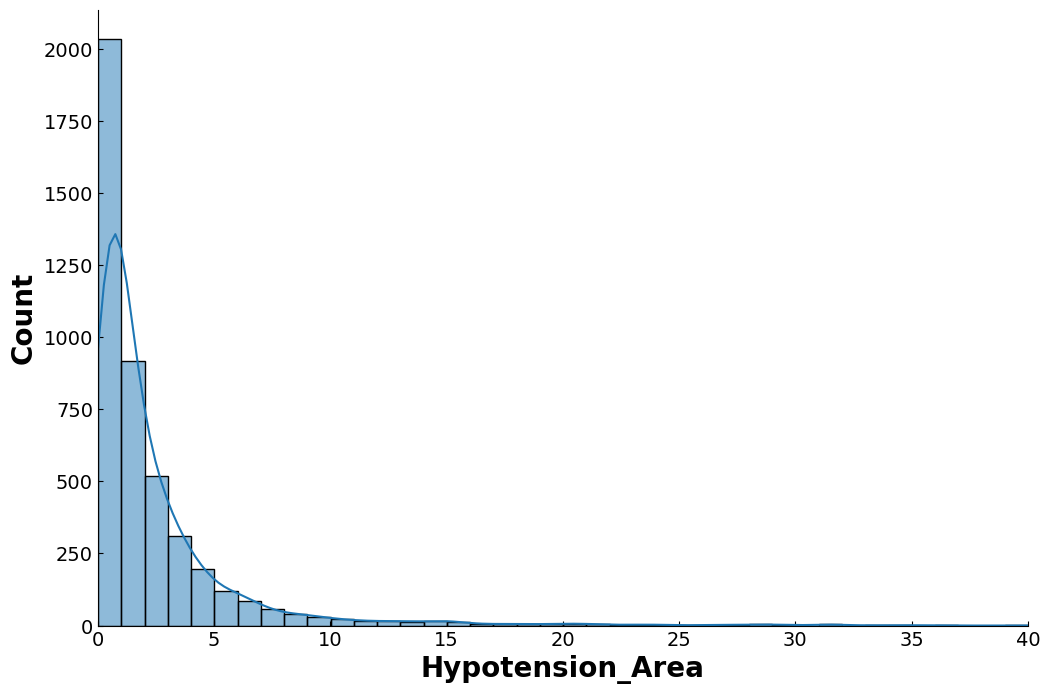

In [7]:
plt.figure(figsize=(12,8))
ax=sns.histplot(df_pih['Hypotension_Area'][df_pih['Hypotension_Time(minute)'] == 1], kde=True, binwidth=1)
ax.set_xlabel('Hypotension_Area', fontsize=20, weight='bold')
ax.set_ylabel('Count', fontsize=20, weight='bold')
plt.xlim(0,40)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

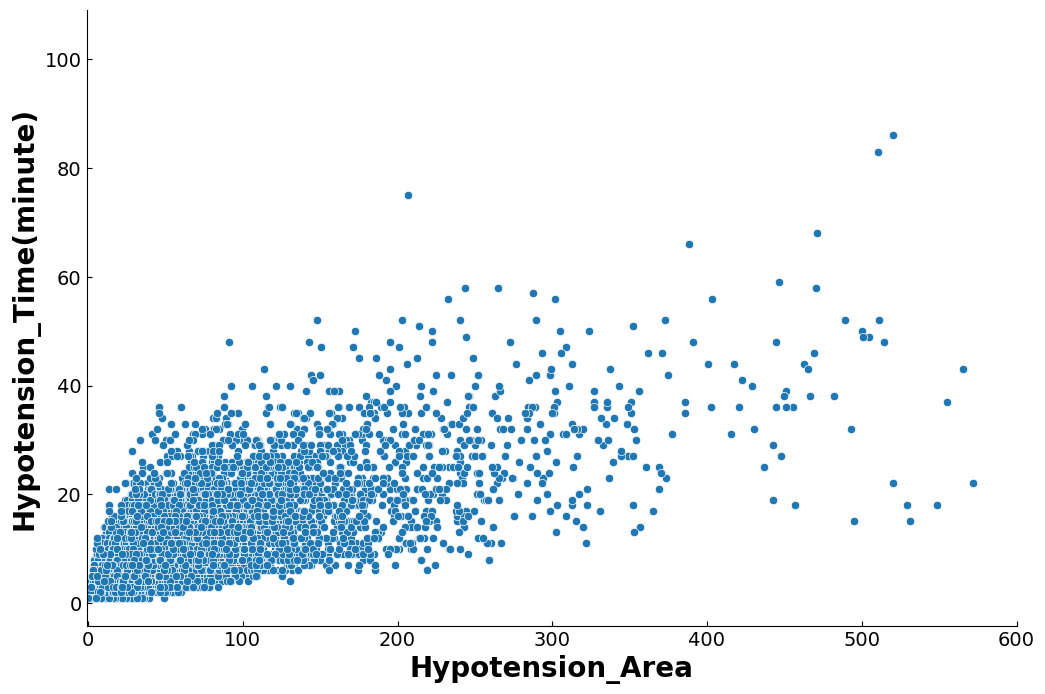

0.787735874907225
PearsonRResult(statistic=0.7877358749072255, pvalue=0.0)


In [8]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Hypotension_Area', y='Hypotension_Time(minute)', data=df_pih)
ax.set_xlabel('Hypotension_Area', fontsize=20, weight='bold')
ax.set_ylabel('Hypotension_Time(minute)', fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-1,600)
plt.show()

x = df_pih['Hypotension_Area'][(pd.isnull(df_pih['Hypotension_Area'])==False) & (pd.isnull(df_pih['Hypotension_Time(minute)'])==False)].to_numpy()
y = df_pih['Hypotension_Time(minute)'][(pd.isnull(df_pih['Hypotension_Area'])==False) & (pd.isnull(df_pih['Hypotension_Time(minute)'])==False)].to_numpy()

print(np.corrcoef(x,y)[0,1])
import scipy.stats as stats
print(stats.pearsonr(x,y))

## 데이터 더미화
---

In [9]:
pldf = pl.read_csv(datapath+'07_Diagnosis_dummies.csv')
## Polars의 Lazy evaluation을 이용하여 실제 메모리를 사용하지 않고 읽음

current_data_types = pldf.dtypes
current_data_names = pldf.columns

new_data_type = pl.Int8

new_df = pl.DataFrame({col: pldf[col].cast(new_data_type) for col in pldf.columns if col != '마취기록작성번호'})
new_df = new_df.with_columns(pldf['마취기록작성번호'])

pddf = new_df.to_pandas()

In [10]:
fields_ohe1= ['ASA']
fields_ohe2= ['OP_CODE']
ohed1 = pd.get_dummies(df_pih[fields_ohe1],columns=fields_ohe1, dummy_na=True)
ohed2 = pd.get_dummies(df_pih[fields_ohe2],columns=fields_ohe2, dummy_na=True)

## 결측치 처리 방법
---

In [11]:
fill_pih = df_pih.fillna(df_pih.median(), inplace=True)
zero_pih = df_pih.fillna(0)

/tmp/ipykernel_2503533/2241559375.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fill_pih = df_pih.fillna(df_pih.median(), inplace=True)


## 분석
---

### Input, Output 설정

In [12]:
var_list = ['Sex','Age','HT','WT','BMI','rdw','mpv','pdw','na','alp','tc','egfr_ce','egfr_md','icteric_index','wbc','rbc','mcv','mch','mchc','plt','hb','hct','pt_sec','pt_inr','aptt','k','cl','ca','glu','cr','bun','ast','alt','tp','ua','tco2','bilirubin','crp','alb','EMOP','induc_propofol','induc_midazolam','induc_pentotal','Desflurane','Sevoflurane','Propofol','WARD_SBP','WARD_DBP','WARD_MBP','Pre-induction_SBP','Pre-induction_DBP','Pre-induction_MBP']
demo_list = ['Sex','Age','HT','WT','BMI']
preoplab_list = ['rdw','mpv','pdw','na','alp','tc','egfr_ce','egfr_md','icteric_index','wbc','rbc','mcv','mch','mchc','plt','hb','hct','pt_sec','pt_inr','aptt','k','cl','ca','glu','cr','bun','ast','alt','tp','ua','tco2','bilirubin','crp','alb']
anesthetics_list = ['induc_propofol','induc_midazolam','induc_pentotal','Desflurane','Sevoflurane','Propofol']
bp_list = ['WARD_SBP','WARD_DBP','WARD_MBP','Pre-induction_SBP','Pre-induction_DBP','Pre-induction_MBP']
pat_bp_list = ['WT','HT','Age','Sex','ASA','WARD_SBP','WARD_DBP','WARD_MBP','Pre-induction_SBP','Pre-induction_DBP','Pre-induction_MBP']

y_pih = df_pih['Hypotension']
y_pihm = df_pih['PIH_Gr']
y_pih1 = df_pih['PIH_Gr1']
y_pih2 = df_pih['PIH_Gr2']
y_pih3 = df_pih['PIH_Gr3']

In [13]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(df_pih[pat_bp_list], y_pih, test_size=0.20, shuffle=True)

In [14]:
for i in X_train_t.keys():
    test = X_train_t[pd.isna(X_train_t[i])]
    if len(test) != 0:
        print("Null 값 존재")
## Null 값 존재하지 않음

In [15]:
def my_model(hidden_layer_num, node_size, batch_normalization, drop_out, drop_out_rate, learning_rate):

    ### clear memory
    if K.backend() == 'tensorflow':
        K.clear_session()

    model = keras.Sequential()

    ### Input Layer
    model.add(keras.layers.InputLayer(input_shape=(len(X_train_t_scaled.columns),)))

    ### Hidden Layer
    for i in range(hidden_layer_num):
        model.add(keras.layers.Dense(node_size))
        if batch_normalization: model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.ReLU())
        if drop_out: model.add(keras.layers.Dropout(drop_out_rate))

    ### Output Layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    ### Compile
    model.compile(optimizer= keras.optimizers.Adam(learning_rate),
                  loss='binary_crossentropy',
                  metrics=["accuracy"])

    return model
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_auroc', mode='max', verbose=1, patience=10, restore_best_weights=True)

### Nomalization

In [16]:
scaler = StandardScaler()

feature = X_train_t.columns
scaler.fit(X_train_t)
X_train_t_scaled = pd.DataFrame(scaler.transform(X_train_t))
X_test_t_scaled = pd.DataFrame(scaler.transform(X_test_t))
## nomalization 잘 됨






### Gridsearch

In [19]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
import dask.dataframe as dd

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(df_pih, y_pih, test_size=0.20, shuffle=True)
 
def clf3():
    rfc = RandomForestClassifier()
    gb = GradientBoostingClassifier() 
    xg = XGBClassifier(tree_method='gpu_hist', gpu_id=[1,2])
  
    return rfc, gb, xg

rf_parameters ={'max_depth' : [3,4,5,6,7,8] , 'n_estimators': [3,4, 5,10], 'random_state':[99]}
gb_parameters ={'max_depth' : [4,5,7] , 'n_estimators': [3,4, 5,10,30], 'learning_rate':[0.01, 0.1], 'random_state':[99]}
xg_parameters ={
    'max_depth' : [6,7,8,9,10] , 
    'n_estimators': [10, 50, 100, 200, 500], 
    'learning_rate':[0.01, 0.1], 
    'gamma': [0.5, 1, 2], 
    'random_state':[99],
    'alpha' : [0, 1, 5, 10],
    'subsample' : [0.5, 0.8, 1.0],
    'colsample_bytree' : [0.5, 0.8, 1.0],
    'lambda' : [0, 1, 5, 10],
}

In [ ]:
rfc, gb, xg = clf3()

grid_search_xg = model_selection.GridSearchCV ( estimator = xg, param_grid = xg_parameters, scoring = 'recall', cv = 10)
 
grid_search_xg.fit(X=X_train_full, y=y_train_full)
best_rfc = grid_search_rf.best_estimator_
best_rfc

In [ ]:
X_train_full = dd.from_pandas(X_train_full, npartitions=73)
X_test_full = dd.from_pandas(X_test_full, npartitions=73)
# y_test_full = dd.from_pandas(y_test_full, npartitions=73)
# y_train_full = dd.from_pandas(y_train_full, npartitions=73)

from dask_cuda import LocalCUDACluster
from dask.distributed import Client

cluster = LocalCUDACluster(n_workers=2)
client = Client(cluster)
 
def clf3():
    rfc = RandomForestClassifier()
    gb = GradientBoostingClassifier() 
    xg = XGBClassifier(tree_method='gpu_hist', gpu_id=[1,2])
  
    return rfc, gb, xg

rf_parameters ={'max_depth' : [3,4,5,6,7,8] , 'n_estimators': [3,4, 5,10], 'random_state':[99]}
gb_parameters ={'max_depth' : [4,5,7] , 'n_estimators': [3,4, 5,10,30], 'learning_rate':[0.01, 0.1], 'random_state':[99]}
xg_parameters ={
    'max_depth' : [6,7,8,9,10] , 
    'n_estimators': [10, 50, 100, 200, 500], 
    'learning_rate':[0.01, 0.1], 
    'gamma': [0.5, 1, 2], 
    'random_state':[99],
    'alpha' : [0, 1, 5, 10],
    'subsample' : [0.5, 0.8, 1.0],
    'colsample_bytree' : [0.5, 0.8, 1.0],
    'lambda' : [0, 1, 5, 10],
}
rfc.set_params(**rf_parameters)
gb.set_params(**gb_parameters)
xg.set_params(**xg_parameters)

grid_search_xg = model_selection.GridSearchCV ( estimator = xg,
                                                param_grid = xg_parameters,
                                                scoring = 'recall',
                                                cv = 10,
                                                n_jobs=-1 )
 
grid_search_xg.fit(X=X_train_full.compute(), y=y_train_full.values)
best_rfc = grid_search_rf.best_estimator_
best_rfc

2023-08-29 16:34:43,978 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-08-29 16:34:43,978 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-08-29 16:34:44,191 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-08-29 16:34:44,191 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize


In [110]:
import dask.dataframe as dd

# len(X_train_full.columns)

type(y_train_full)

pandas.core.series.Series

In [82]:
# pih_t_xgb = xgb.XGBClassifier(gamma=0,learning_rate=0.1,max_depth=10,min_child_weight=1,n_estimators=300)
# pih_t_xgb = xgb.XGBClassifier(gamma=0,learning_rate=0.001,max_depth=10,min_child_weight=1,n_estimators=300)
pih_t_xgb = xgb.XGBClassifier(gamma=0,learning_rate=0.001,max_depth=10,min_child_weight=1,n_estimators=300, tree_method='gpu_hist', gpu_id=1)
# pih_t_xgb.fit(X=X_train_t, y=y_train_t, verbose=1, tree_method='gpu_hist', gpu_id=0)
pih_t_xgb.fit(X=X_train_t, y=y_train_t, verbose=2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Predict

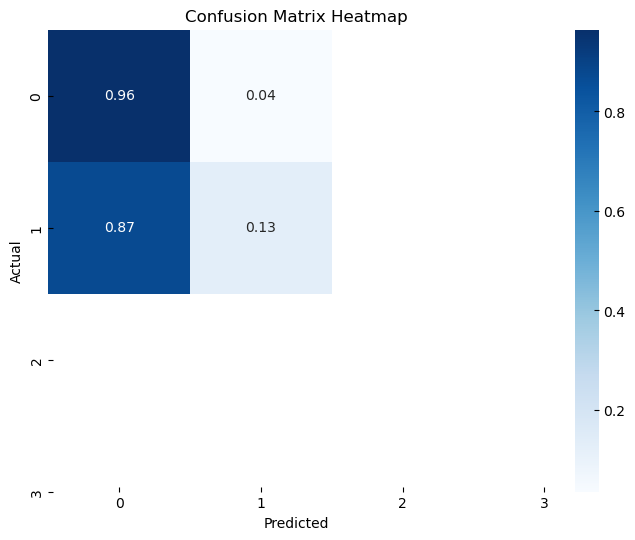

In [83]:
y_test_pred_t = pih_t_xgb.predict(X_test_t)
conf_mat = confusion_matrix(y_test_t, y_test_pred_t)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# heatmap으로 표현
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_normalized, annot=True, cmap='Blues', fmt='.2f', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [89]:
conf_mat

array([[10275,   375],
       [ 3184,   461]])

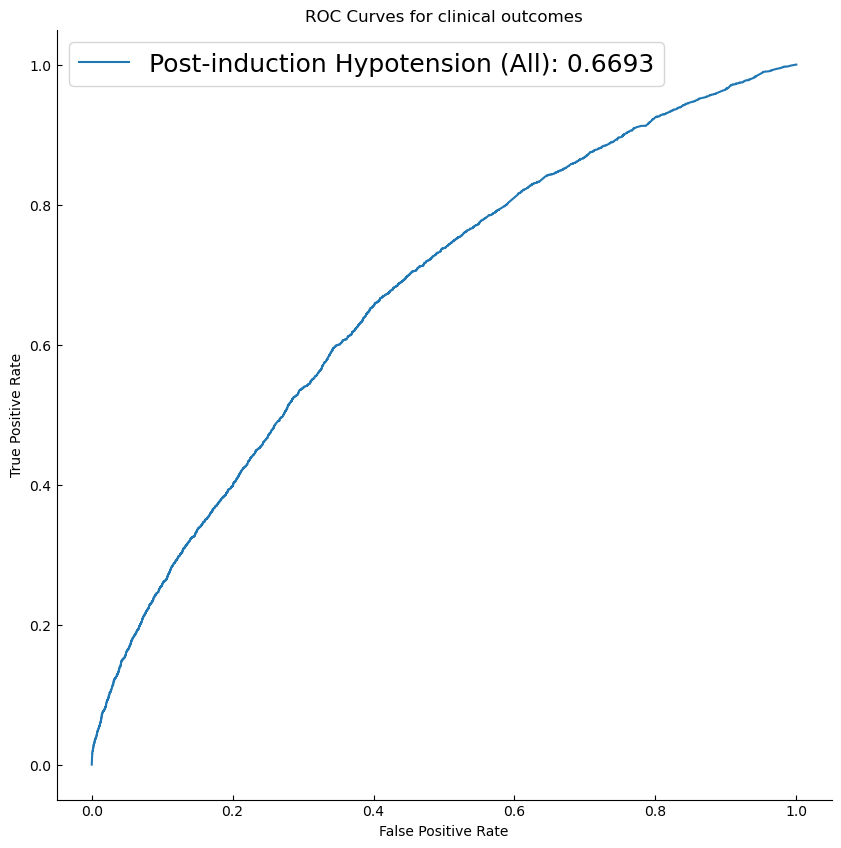

In [90]:
y_test_xgb_proba_t = pih_t_xgb.predict_proba(X_test_t)

fprt, tprt, _ = roc_curve(y_test_t, y_test_xgb_proba_t[:, 1], pos_label= pih_t_xgb.classes_[1])

plt.figure(figsize=(10,10))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for clinical outcomes')

plt.plot(fprt, tprt,label='Post-induction Hypotension (All): %.4f' %(roc_auc_score(y_test_t, y_test_xgb_proba_t[:, 1])))

plt.legend(fontsize=18)
plt.show()

In [92]:
print(len(X_train_t), len(X_test_t))

57178 14295
